Logistic Regression and AdaBoost classifiers using Plurality + Additional +Whole dataset+ All metrics


Accuracy: 0.7844036697247706
Precision: 0.7955161613487102
Recall: 0.7844036697247706
F1 Score: 0.7680326901729165
AUC: 0.8304714940001517
V Score: 0.6629085287803703


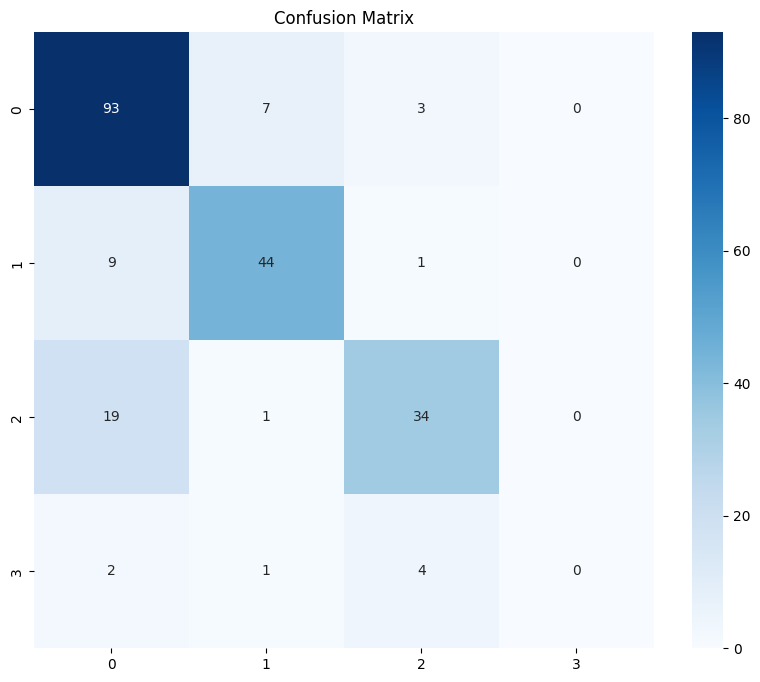

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the existing dataset 
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\dataset_NoPCA.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Define the class names
class_names = y.unique()

# Encode the target variable into integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression classifier on the scaled features
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

# Train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

# Make predictions using the trained classifiers
lr_pred = lr_classifier.predict(X_test_scaled)
adaboost_pred = adaboost_classifier.predict(X_test)

# Apply Plurality prediction using pandas DataFrame mode
plurality_pred = pd.DataFrame([lr_pred, adaboost_pred]).mode().iloc[0]

# Calculate accuracy, precision, recall, F1 score, AUC, and V score
accuracy = accuracy_score(y_test, plurality_pred)
precision = precision_score(y_test, plurality_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, plurality_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, plurality_pred, average='weighted', zero_division=1)
auc = roc_auc_score(pd.get_dummies(y_test).values, pd.get_dummies(plurality_pred).values, multi_class='ovr')
v_score = matthews_corrcoef(y_test, plurality_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)

# Calculate and visualize the confusion matrix
confusion_matrix = confusion_matrix(y_test, plurality_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()
